## WeatherPy_SKG

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/my_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [4]:
print(cities[:10])

['ushuaia', 'tulle', 'port blair', 'iqaluit', 'caravelas', 'kaabong', 'bluff', 'mayumba', 'pevek', 'rikitea']


In [5]:
# to print through our list with a numbered index
for i, city in enumerate(cities[:10]):
    # Group cities in sets of 50
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0
    
        print(f'{i}, {city}')

0, ushuaia
1, tulle
2, port blair
3, iqaluit
4, caravelas
5, kaabong
6, bluff
7, mayumba
8, pevek
9, rikitea


In [6]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c052c8f986aa8e02b478b48d49f29a68


In [7]:
query_url = url + "&q=" + cities[0]
response = requests.get(query_url).json()
print(response["name"])

Ushuaia


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#url = "https://api.openweathermap.org/data/2.5/weather?"
#units = "metric"

#Test for url's and to make sure my api key is working 
#query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units 
#response = requests.get(query_url + city).json()
#weather_response = response.get(query_url)

city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Create Counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    # Group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # create the endpoint URL for each city
    query_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    
    try:
        #query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
        
        response = requests.get(query_url).json()
        #weather_response = response.get(query_url)
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])

    except:
        print("City not found. Skipping..")
        pass

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | tulle
Processing Record 3 of Set 1 | port blair
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | caravelas
Processing Record 6 of Set 1 | kaabong
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | mayumba
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | mudgee
Processing Record 12 of Set 1 | sabzevar
Processing Record 13 of Set 1 | yaan
Processing Record 14 of Set 1 | shingu
Processing Record 15 of Set 1 | anderson
Processing Record 16 of Set 1 | cap malheureux
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | abbotsford
Processing Record 20 of Set 1 | aswan
Processing Record 21 of Set 1 | harer
Processing Record 22 of Set 1 | cherskiy
Processing Record 23 of Set 1 | mehamn
Processing Record 24 of Set 1 | neustrelitz
Processing Record 25 of Set 1 | grand r

Processing Record 39 of Set 4 | carutapera
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | corsicana
Processing Record 42 of Set 4 | kidal
Processing Record 43 of Set 4 | kahului
Processing Record 44 of Set 4 | yellowknife
Processing Record 45 of Set 4 | batagay
Processing Record 46 of Set 4 | galesong
Processing Record 47 of Set 4 | bafq
Processing Record 48 of Set 4 | yatou
Processing Record 49 of Set 4 | umzimvubu
City not found. Skipping..
Processing Record 50 of Set 4 | weinan
Processing Record 1 of Set 5 | sentyabrskiy
City not found. Skipping..
Processing Record 2 of Set 5 | yumen
Processing Record 3 of Set 5 | codrington
Processing Record 4 of Set 5 | innisfail
Processing Record 5 of Set 5 | kieta
Processing Record 6 of Set 5 | belaya gora
Processing Record 7 of Set 5 | port alfred
Processing Record 8 of Set 5 | hofn
Processing Record 9 of Set 5 | milkovo
Processing Record 10 of Set 5 | santa cruz
Processing Record 11 of Set 5 | marawi
Processing Re

Processing Record 31 of Set 8 | ergani
Processing Record 32 of Set 8 | wanaka
Processing Record 33 of Set 8 | ewo
Processing Record 34 of Set 8 | kismayo
Processing Record 35 of Set 8 | nerchinskiy zavod
Processing Record 36 of Set 8 | romny
Processing Record 37 of Set 8 | walvis bay
Processing Record 38 of Set 8 | mao
Processing Record 39 of Set 8 | richmond
Processing Record 40 of Set 8 | wajima
Processing Record 41 of Set 8 | north myrtle beach
Processing Record 42 of Set 8 | uruguaiana
Processing Record 43 of Set 8 | karla
Processing Record 44 of Set 8 | samalaeulu
City not found. Skipping..
Processing Record 45 of Set 8 | carnarvon
Processing Record 46 of Set 8 | kungurtug
Processing Record 47 of Set 8 | morehead
Processing Record 48 of Set 8 | blagoveshchenka
Processing Record 49 of Set 8 | preobrazheniye
Processing Record 50 of Set 8 | longlac
City not found. Skipping..
Processing Record 1 of Set 9 | mmathubudukwane
Processing Record 2 of Set 9 | nchelenge
Processing Record 3 of

Processing Record 20 of Set 12 | ambovombe
Processing Record 21 of Set 12 | fuerte olimpo
Processing Record 22 of Set 12 | uptar
Processing Record 23 of Set 12 | santa vitoria do palmar
Processing Record 24 of Set 12 | pedasi
Processing Record 25 of Set 12 | meyungs
City not found. Skipping..
Processing Record 26 of Set 12 | vaitupu
City not found. Skipping..
Processing Record 27 of Set 12 | ahar
Processing Record 28 of Set 12 | olsztyn
Processing Record 29 of Set 12 | gat
Processing Record 30 of Set 12 | guarapari
Processing Record 31 of Set 12 | ituni
City not found. Skipping..
Processing Record 32 of Set 12 | nyagan
Processing Record 33 of Set 12 | lethem
Processing Record 34 of Set 12 | simpsonville
Processing Record 35 of Set 12 | ayagoz
Processing Record 36 of Set 12 | bom jesus
Processing Record 37 of Set 12 | mount pleasant
Processing Record 38 of Set 12 | kampong thum
Processing Record 39 of Set 12 | mulege
Processing Record 40 of Set 12 | altos
Processing Record 41 of Set 12 

In [9]:
# make a dictionary to hold the weather data for each city 
city_weather_dict = {"City": city_name,
                    "Lat": lat,
                    "Lng": long,
                    "Max Temp": max_temp,
                    "Humidity": humidity,
                    "Cloudiness": cloudiness,
                    "Wind Speed": wind_speed,
                    "Country": country,
                    "Date": date}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_weather_df = pd.DataFrame.from_dict(city_weather_dict)
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,46.06,66,75,3.44,AR,1650742629
1,Arrondissement de Tulle,45.3333,1.8333,44.98,99,100,6.35,FR,1650742639
2,Port Blair,11.6667,92.7500,80.64,94,20,2.30,IN,1650742640
3,Iqaluit,63.7506,-68.5145,11.93,72,20,3.44,CA,1650742640
4,Caravelas,-17.7125,-39.2481,80.19,80,48,8.10,BR,1650742640


In [12]:
city_weather_df.to_csv('output_data/my_cities.csv', header=True, index=False, mode='w')

In [13]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,18.840201,16.584004,60.558399,69.383094,56.336331,8.401619,1.650743e+09
std,34.354149,91.158628,22.538957,23.175064,40.414477,6.259306,8.695261e+01
min,-54.800000,-179.166700,-14.300000,1.000000,0.000000,0.000000,1.650742e+09
25%,-10.279200,-65.990725,47.437500,53.000000,12.000000,3.685000,1.650743e+09
50%,23.098450,20.280450,65.615000,75.000000,65.000000,7.000000,1.650743e+09
75%,48.699925,99.925475,79.022500,88.000000,100.000000,11.500000,1.650743e+09
max,78.218600,179.316700,96.760000,100.000000,100.000000,47.180000,1.650743e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
humid_cities = city_weather_df[(city_weather_df["Humidity"]>100)].index
humid_cities

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

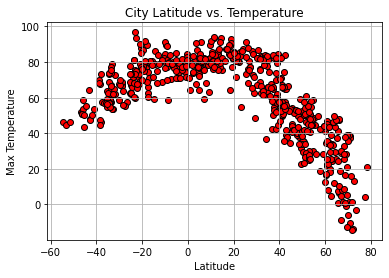

<Figure size 432x288 with 0 Axes>

In [27]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], facecolors="red", edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()
plt.savefig("output_data\city_lat_vs_temp.png")

## Latitude vs. Humidity Plot

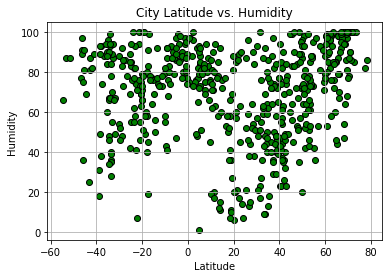

<Figure size 432x288 with 0 Axes>

In [28]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], facecolors="green", edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
plt.savefig("output_data\city_lat_vs_humid.png")

## Latitude vs. Cloudiness Plot

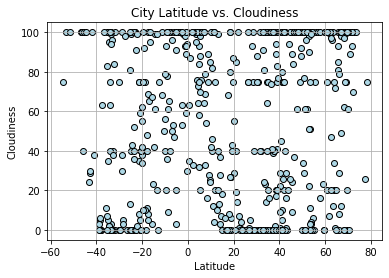

<Figure size 432x288 with 0 Axes>

In [30]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], facecolors="lightblue", edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
plt.savefig("output_data\city_lat_vs_cloud.png")

## Latitude vs. Wind Speed Plot

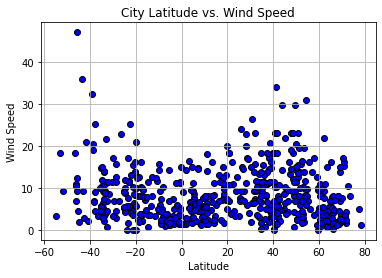

<Figure size 432x288 with 0 Axes>

In [33]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], facecolors="blue", edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.savefig("output_data\city_lat_vs_winds.png")

## Linear Regression

In [43]:
north_hemis = city_weather_df.loc[city_weather_df["Lat"] > 0]
south_hemis = city_weather_df.loc[city_weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7173253357332021


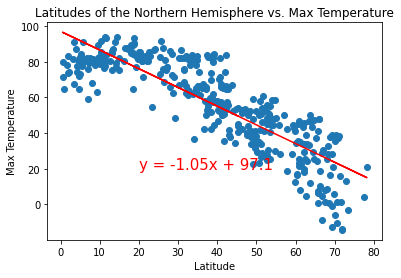

In [44]:
x_values = north_hemis["Lat"]
y_values = north_hemis["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title("Latitudes of the Northern Hemisphere vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-squared is: 0.5276646847501588


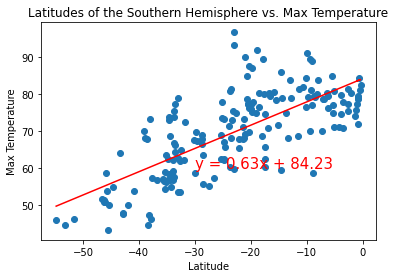

In [47]:
x_values = south_hemis["Lat"]
y_values = south_hemis["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 60),fontsize=15,color="red")
plt.title("Latitudes of the Southern Hemisphere vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08427655467255904


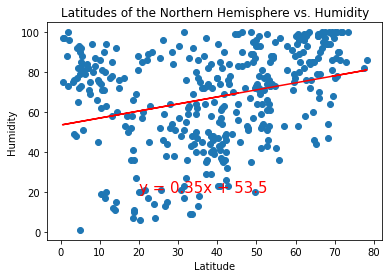

In [48]:
x_values = north_hemis["Lat"]
y_values = north_hemis["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title("Latitudes of the Northern Hemisphere vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.027691961732995703


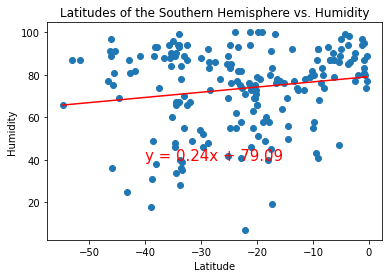

In [50]:
x_values = south_hemis["Lat"]
y_values = south_hemis["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title("Latitudes of the Southern Hemisphere vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.020793508666964094


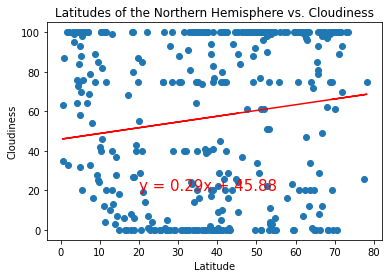

In [51]:
x_values = north_hemis["Lat"]
y_values = north_hemis["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title("Latitudes of the Northern Hemisphere vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.031210302568090993


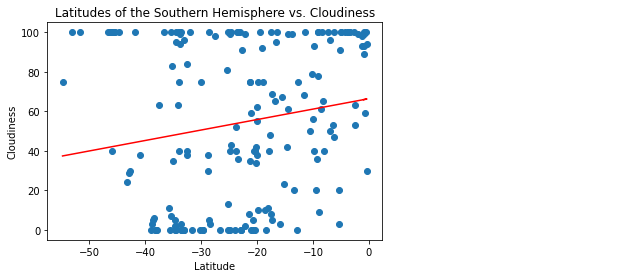

In [55]:
x_values = south_hemis["Lat"]
y_values = south_hemis["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title("Latitudes of the Southern Hemisphere vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00041857751798916106


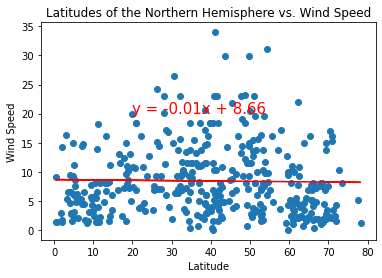

In [53]:
x_values = north_hemis["Lat"]
y_values = north_hemis["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title("Latitudes of the Northern Hemisphere vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10841588093411544


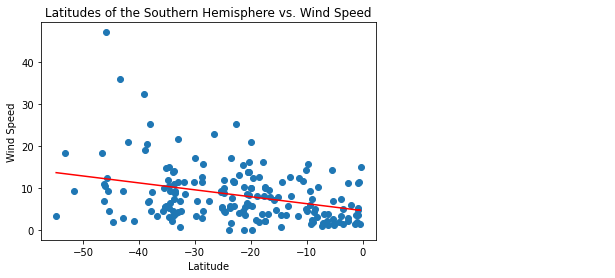

In [56]:
x_values = south_hemis["Lat"]
y_values = south_hemis["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title("Latitudes of the Southern Hemisphere vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()